In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [2]:
house=pd.read_csv('house')

In [3]:
df=house.copy()

In [4]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [5]:
df.shape

(29451, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [7]:
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

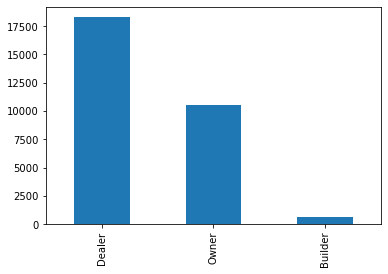

In [8]:
df['POSTED_BY'].value_counts().plot(kind='bar')
plt.show()

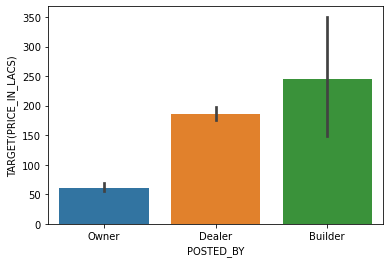

In [9]:
sns.barplot(df['POSTED_BY'],df['TARGET(PRICE_IN_LACS)'])
plt.show()

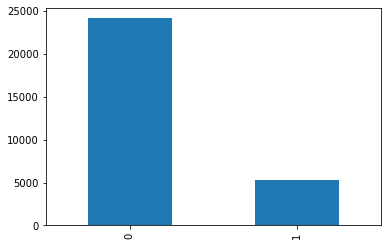

In [10]:
df['UNDER_CONSTRUCTION'].value_counts().plot(kind='bar')
plt.show()

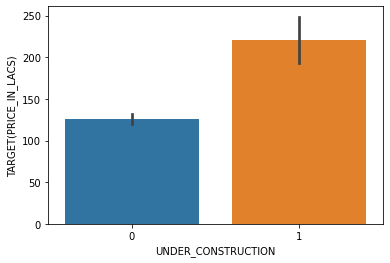

In [11]:
sns.barplot(df['UNDER_CONSTRUCTION'],df['TARGET(PRICE_IN_LACS)'])
plt.show()

In [12]:
df['RERA'].value_counts()
# O for not RERA (Real Estate Regulatory Authority) approval
# 1 for RERA approval

0    20088
1     9363
Name: RERA, dtype: int64

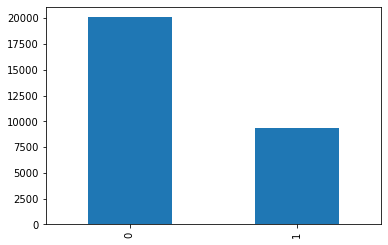

In [13]:
df['RERA'].value_counts().plot(kind='bar')
plt.show()

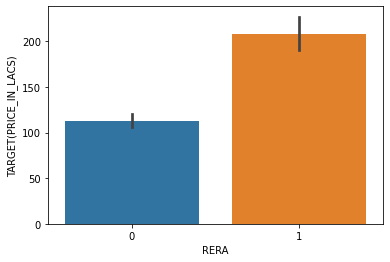

In [14]:
sns.barplot(df['RERA'],df['TARGET(PRICE_IN_LACS)'])
plt.show()

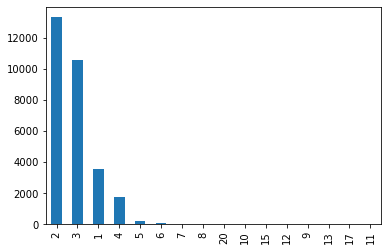

In [15]:
df['BHK_NO.'].value_counts().plot(kind='bar')
plt.show()

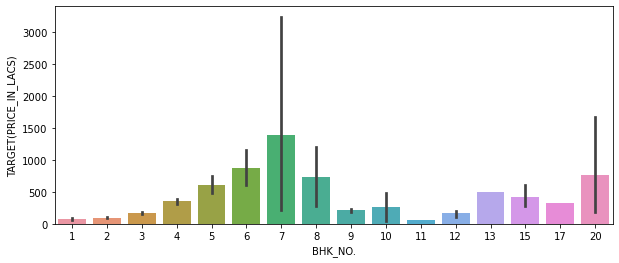

In [16]:
plt.figure(figsize=(10,4))
sns.barplot(df['BHK_NO.'],df['TARGET(PRICE_IN_LACS)'])
plt.show()

In [17]:
df.drop('BHK_OR_RK',axis=1,inplace=True)

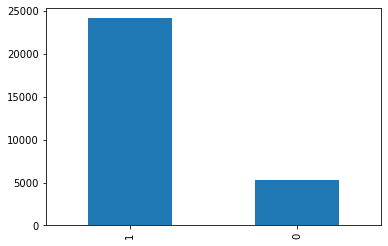

In [18]:
df['READY_TO_MOVE'].value_counts().plot(kind='bar')
plt.show()

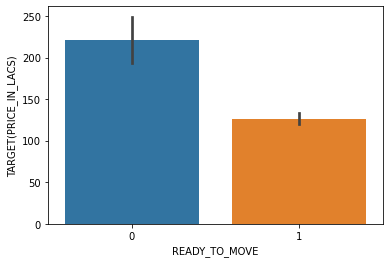

In [19]:
sns.barplot(df['READY_TO_MOVE'],df['TARGET(PRICE_IN_LACS)'])
plt.show()

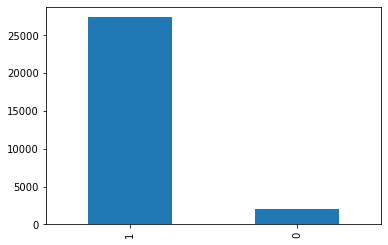

In [20]:
df['RESALE'].value_counts().plot(kind='bar')
plt.show()

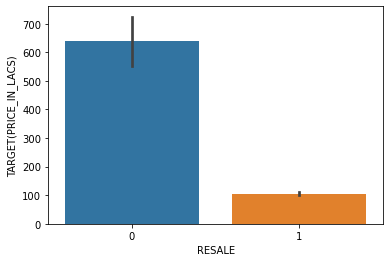

In [21]:
sns.barplot(df['RESALE'],df['TARGET(PRICE_IN_LACS)'])
plt.show()

In [22]:
df['City']=0
address=df['ADDRESS'].str.split(',')
for i in range(len(address)):
    df['City'][i]=address[i][1]
df.drop('ADDRESS',axis=1,inplace=True)

In [23]:
a=df['City'].value_counts()
city=[]
for i in range(len(df['City'])):
  if df['City'][i] == '':
    df['City'][i]=df['City'].mode()[0]
  if a[df['City'][i]] > 2:
    city.append(df['City'][i])
for i in range(len(df['City'])):
  if a[df['City'][i]] < 2:
    df['City'][i]=random.choice(city)

In [24]:
df['City'].value_counts()

Bangalore    4367
Lalitpur     3003
Mumbai       2035
Pune         2001
Noida        1774
             ... 
Patiala         2
Dalhousie       2
Kotdwara        2
Kadapa          2
Haldia          2
Name: City, Length: 197, dtype: int64

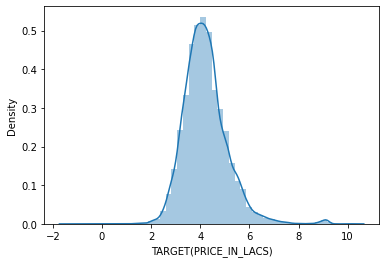

In [25]:
sns.distplot(np.log(df['TARGET(PRICE_IN_LACS)']))
plt.show()

In [26]:
df['TARGET(PRICE_IN_LACS)']=np.log(df['TARGET(PRICE_IN_LACS)'])

In [27]:
df.corr()['TARGET(PRICE_IN_LACS)']

UNDER_CONSTRUCTION       0.048006
RERA                     0.142964
BHK_NO.                  0.479781
SQUARE_FT                0.064136
READY_TO_MOVE           -0.048006
RESALE                  -0.094225
LONGITUDE               -0.128747
LATITUDE                -0.062362
TARGET(PRICE_IN_LACS)    1.000000
Name: TARGET(PRICE_IN_LACS), dtype: float64

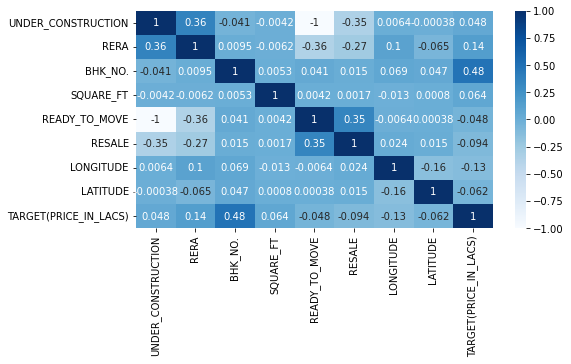

In [28]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [29]:
X=df.drop('TARGET(PRICE_IN_LACS)',axis=1)
y=df['TARGET(PRICE_IN_LACS)']

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=2)

In [31]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),City
0,Owner,0,0,2,1300.236407,1,1,12.969910,77.597960,4.007333,Bangalore
1,Dealer,0,0,2,1275.000000,1,1,12.274538,76.644605,3.931826,Mysore
2,Owner,0,0,2,933.159722,1,1,12.778033,77.632191,3.761200,Bangalore
3,Owner,0,1,2,929.921143,1,1,28.642300,77.344500,4.135167,Ghaziabad
4,Dealer,1,0,2,999.009247,0,1,22.592200,88.484911,4.102643,Kolkata


In [32]:
df['City'].value_counts()

Bangalore    4367
Lalitpur     3003
Mumbai       2035
Pune         2001
Noida        1774
             ... 
Patiala         2
Dalhousie       2
Kotdwara        2
Kadapa          2
Haldia          2
Name: City, Length: 197, dtype: int64

### Linear Regression

In [33]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,9])
    # We will not count price that's why our counting change
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.5865698761964788
MAE 0.3852024677349492


### Ridge Regression

In [34]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,9])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.5853532682698355
MAE 0.3862898713670284


### Lasso regression

In [35]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,9])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.5746059381482813
MAE 0.3934245409525296


### KNN

In [36]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,9])
],remainder='passthrough')

step2 = KNeighborsRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.640641748389043
MAE 0.3831066038349399


### Decision Tree

In [37]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,9])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.792641095245839
MAE 0.29930502313024215


### Adaboost

In [38]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,9])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.47697760384716015
MAE 0.504496914744859


### Gradient Boosting

In [39]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,9])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.854934868151364
MAE 0.24684812670832487


### Xgboost

In [40]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,9])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8544775384830227
MAE 0.2459592751436112


### Random Forest

In [41]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,9])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8629937804649425
MAE 0.23053311772485352


In [42]:
import pickle
pickle.dump(df,open('df4.pkl','wb'))
pickle.dump(pipe,open('pipe4.pkl','wb'))